#  Функции Сфера и Розенброк

Лабораторная работа 2, Крижановская Анна, М8О-109СВ-24:

- **Сфера** – функция, равная сумме квадратов координат.
- **Розенброк** – классическая функция с узкой долиной, усложняющая поиск минимума.

Реализованы алгоритмы градиентного спуска, визуализация траекторий оптимизации и тестирование работы алгоритмов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Определение функций: Сфера и Розенброк

In [2]:
def sphere(x):
    """
    Функция Сфера: сумма квадратов координат.

    Параметры:
        x (np.array): Вектор координат.

    Возвращает:
        float: Значение функции для вектора x.
    """
    return np.sum(np.power(x, 2))

def rosenbrock(x):
    """
    Функция Розенброк (для двумерного случая):
    f(x) = 100*(x2 - x1^2)^2 + (1 - x1)^2

    Параметры:
        x (np.array): Вектор размерности 2, где x[0] — x1, x[1] — x2.

    Возвращает:
        float: Значение функции Розенброка.
    """
    x1 = x[0]
    x2 = x[1]
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

## Численное вычисление градиента

In [3]:
def numerical_gradient(f, x, h=1e-5):
    """
    Вычисление градиента функции f в точке x методом конечных разностей.

    Параметры:
        f: функция, для которой вычисляем градиент.
        x: вектор координат.
        h: малый шаг (по умолчанию 1e-5).

    Возвращает:
        np.array: приближённый градиент в точке x.
    """
    grad = np.zeros_like(x, dtype=float)
    fx = f(x)
    for i in range(len(x)):
        x[i] += h
        grad[i] = (f(x) - fx) / h
        x[i] -= h
    return grad

## Классический градиентный спуск

In [4]:
def gradient_descent(f, grad_f, x0, alpha=0.01, epsilon=1e-6, max_iters=1000):
    """
    Алгоритм градиентного спуска для минимизации функции f.

    Параметры:
        f: минимизируемая функция.
        grad_f: функция для вычисления градиента (например, numerical_gradient).
        x0: начальная точка (список или массив).
        alpha: шаг обучения.
        epsilon: критерий сходимости.
        max_iters: максимальное количество итераций.

    Возвращает:
        tuple: (точка минимума, траектория оптимизации).
    """
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]

    for i in range(max_iters):
        grad = grad_f(f, x) if callable(grad_f) else grad_f(x)
        x_new = x - alpha * grad
        trajectory.append(x_new.copy())
        if np.linalg.norm(x_new - x) < epsilon:
            print(f"Сходимость достигнута за {i + 1} итераций.")
            break
        x = x_new

    return x, np.array(trajectory)

## Визуализация 3D поверхности и траектории оптимизации

In [5]:
def plot_3d_function_with_trajectory(f, trajectory, title, x_bounds=(-5, 5), y_bounds=(-5, 5)):
    """
    Построение 3D-графика функции f и отображение траектории оптимизации.

    Параметры:
        f: функция, которую визуализируем.
        trajectory: массив точек, полученный в результате оптимизации.
        title: заголовок графика.
        x_bounds, y_bounds: диапазоны для осей x и y.
    """
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(x_bounds[0], x_bounds[1], 100)
    y = np.linspace(y_bounds[0], y_bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[f([xi, yi]) for xi, yi in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot', alpha=0.6, edgecolor='none')

    # Отображение траектории оптимизации
    ax.plot(trajectory[:, 0], trajectory[:, 1], [f(point) for point in trajectory],
            'k-', label="Траектория GD", alpha=0.7)

    # Отображение начальной точки и найденного минимума
    ax.plot([trajectory[0, 0]], [trajectory[0, 1]], [f(trajectory[0])], 'kD', markersize=10, label="Начальная точка")
    ax.plot([trajectory[-1, 0]], [trajectory[-1, 1]], [f(trajectory[-1])], 'kx', markersize=10, label="Найденный минимум")

    # Глобальный минимум (если известен)
    if f == sphere:
        ax.plot([0.], [0.], [sphere([0., 0.])], 'ro', markersize=10, label="Глобальный минимум")
    elif f == rosenbrock:
        ax.plot([1.], [1.], [rosenbrock([1., 1.])], 'ro', markersize=10, label="Глобальный минимум")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(title)
    ax.legend()
    plt.show()

## Тестирование алгоритма градиентного спуска на функциях Сфера и Розенброк

Сходимость достигнута за 559 итераций.
Минимум для функции Сфера: [ 2.67754064e-05 -4.31303479e-05]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


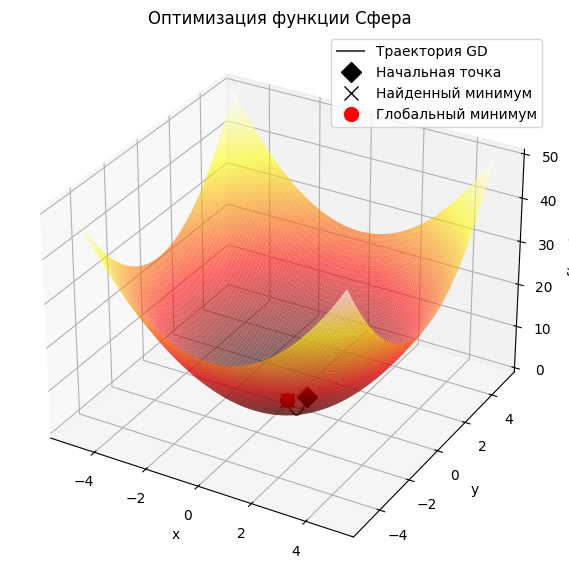

Сходимость достигнута за 5 итераций.
Минимум для функции Розенброк: [-2.92150309e+24  1.47665998e+05]


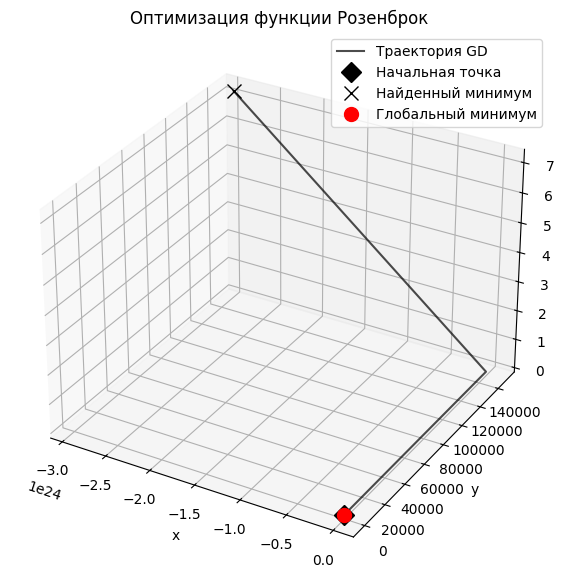

In [6]:
# Тест для функции Сфера
x0_sphere = [2.5, -3.0]
min_sphere, traj_sphere = gradient_descent(sphere, numerical_gradient, x0_sphere, alpha=0.01)
print("Минимум для функции Сфера:", min_sphere)
plot_3d_function_with_trajectory(sphere, traj_sphere, "Оптимизация функции Сфера")

# Тест для функции Розенброк
x0_rosen = [-2.0, 2.0]
min_rosen, traj_rosen = gradient_descent(rosenbrock, numerical_gradient, x0_rosen, alpha=0.005)
print("Минимум для функции Розенброк:", min_rosen)
plot_3d_function_with_trajectory(rosenbrock, traj_rosen, "Оптимизация функции Розенброк")

## Вывод

В данной работе были протестированы алгоритмы градиентного спуска для функций **Сфера** и **Розенброк**. Полученные результаты и визуализация траекторий оптимизации демонстрируют работу алгоритма на данных тестовых функциях.